In [12]:
!pip install seaborn --upgrade

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, mannwhitneyu

In [2]:
df = pd.read_csv("KAG_conversion_data.csv")
df.shape

(1143, 11)

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


# EDA

In [5]:
df["age"].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

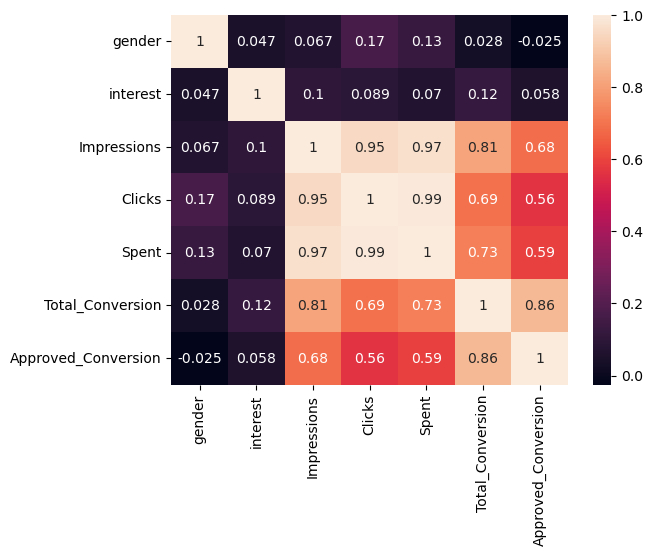

In [6]:
temp_df = df.copy()
temp_df["gender"] = df["gender"].map(lambda x: 0 if x == "M" else 1)
corr_plot = temp_df[["gender", "interest", "Impressions", "Clicks", "Spent", "Total_Conversion", "Approved_Conversion"]].corr()
sns.heatmap(corr_plot, annot = True)
plt.show()

## Standard Metrics
- Click-through Rate (CTR): percentage of impressions that result in clicks. Higher the CTR, better the performance
- Conversion Rate: percentage of clicks that result in a "conversion" i.e. desired action such as sale of a product, download of a file, etc.
- Cost Per Click (CPC): average cost of each click
- Cost Per Conversion: combines CPC and CR metric to give a more relevant estimate of campaign effectiveness
- Conversion Value: value a conversion brings e.g. a 1% conversion may yield sales of $1000
- Return on Advertising Spend: revenue as a percentage of the advertising spend

In [7]:
df["CTR"] = df["Clicks"] * 100 / df["Impressions"]
df["Enquiry_CR"] = df["Total_Conversion"] * 100 / df["Clicks"]
df["Sales_CR"] = df["Approved_Conversion"] * 100 / df["Clicks"]
df["CPC"] = df["Spent"] / df["Clicks"]

In [8]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,Enquiry_CR,Sales_CR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,200.0,100.0,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,100.0,0.0,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,inf,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,100.0,0.0,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,100.0,100.0,1.29


Assumption - enquiry brings in revenue of $5 and a sale brings in revenue of $100

In [9]:
df["ROAS"] = (df["Approved_Conversion"] * 100  + df["Total_Conversion"]* 5) / df["Spent"]

In [10]:
df.replace([np.nan, np.inf], 0, inplace = True)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,Enquiry_CR,Sales_CR,CPC,ROAS
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,200.0,100.0,1.43,76.923080
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,100.0,0.0,0.91,5.494505
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.0,0.0,0.00,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,100.0,0.0,1.25,4.000000
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,100.0,100.0,1.29,81.395351


In [11]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,Enquiry_CR,Sales_CR,CPC,ROAS
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,200.0,100.0,1.43,76.923080
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,100.0,0.0,0.91,5.494505
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.0,0.0,0.00,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,100.0,0.0,1.25,4.000000
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,100.0,100.0,1.29,81.395351


# Picking a campaign

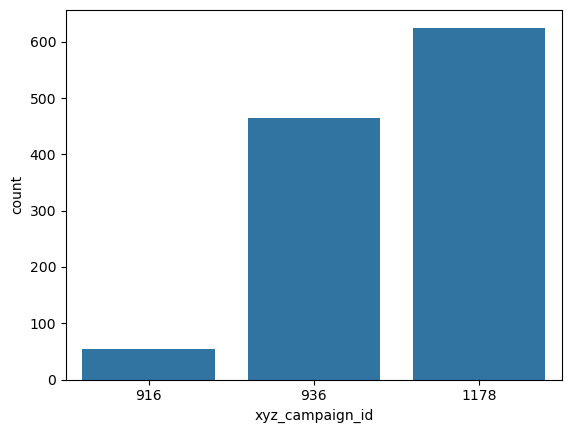

In [12]:
sns.countplot(data = df, x = "xyz_campaign_id")
plt.show()

Campaign 1178 has the highest count of advertisements

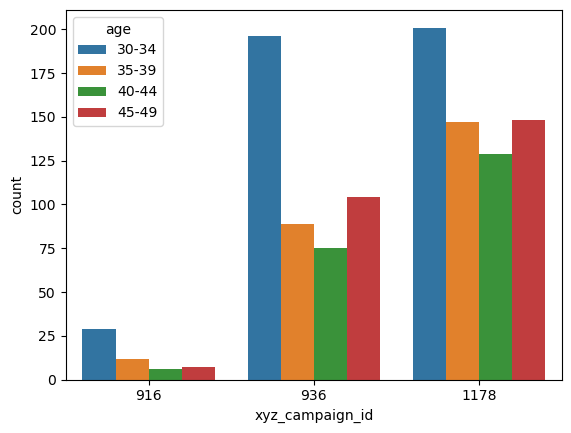

In [13]:
sns.countplot(data = df, x = "xyz_campaign_id", hue = "age")
plt.show()

All campaigns primarily focus on ages 30-34

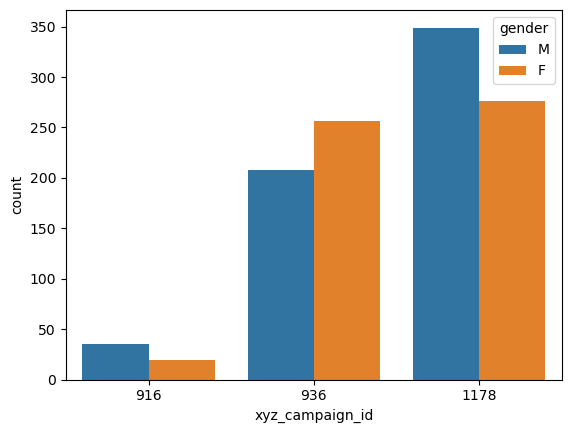

In [14]:
sns.countplot(data = df, x = "xyz_campaign_id", hue = "gender")
plt.show()

Campaigns 916 and 1178 are focused at Males, whereas Campaign 936 is focused on Females

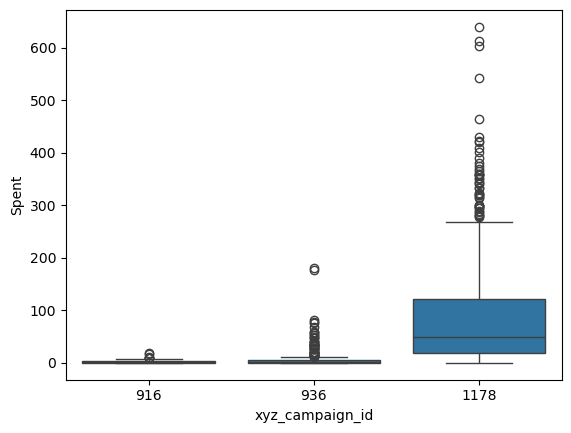

In [15]:
sns.boxplot(data = df, x = "xyz_campaign_id", y = "Spent")
plt.show()

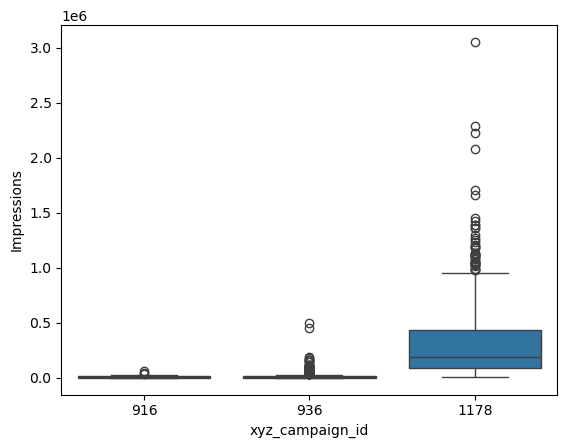

In [16]:
sns.boxplot(data = df, x = "xyz_campaign_id", y = "Impressions")
plt.show()

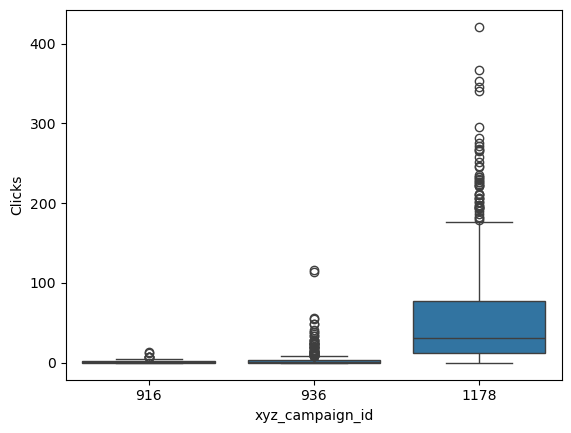

In [17]:
sns.boxplot(data = df, x = "xyz_campaign_id", y = "Clicks")
plt.show()

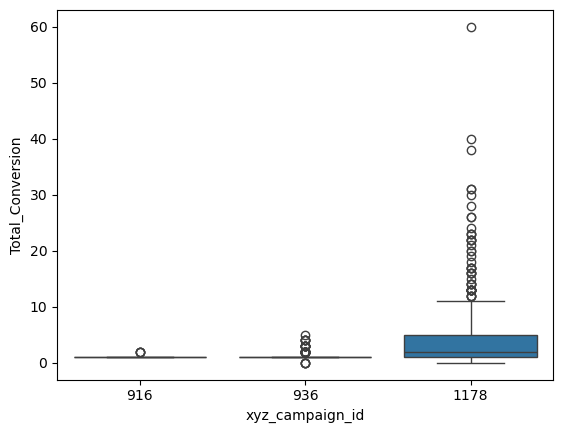

In [18]:
sns.boxplot(data = df, x = "xyz_campaign_id", y = "Total_Conversion")
plt.show()

Campaign 1178 has the highest spent, conversion, impressions and clicks

### Checking performance metrics

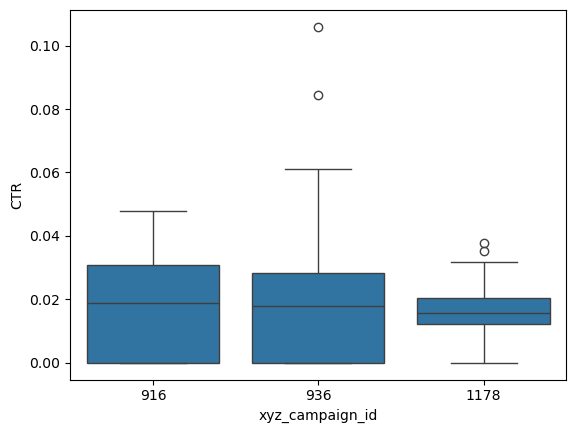

In [19]:
sns.boxplot(data = df, x = "xyz_campaign_id", y = "CTR")
plt.show()

Campaign 1178 has the lowest average CTR

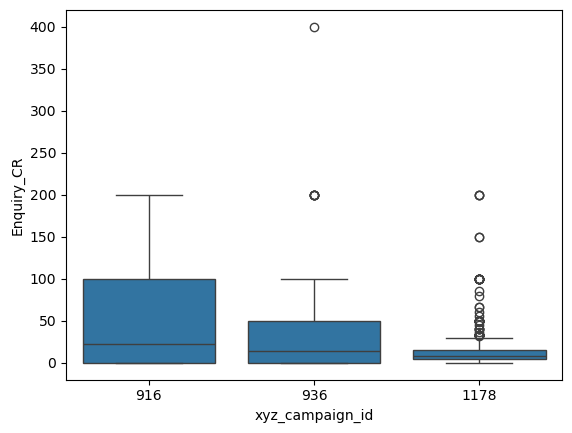

In [20]:
sns.boxplot(data = df, x = "xyz_campaign_id", y = "Enquiry_CR")
plt.show()

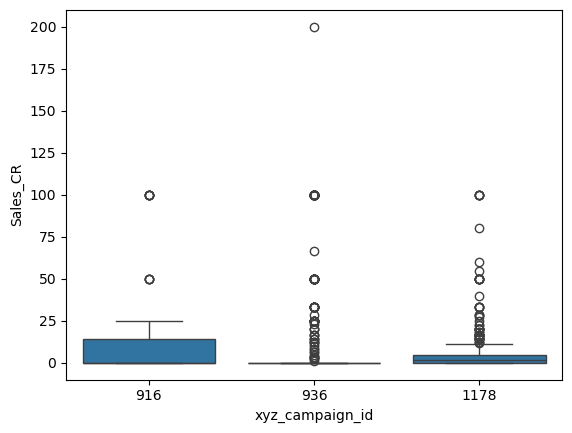

In [21]:
sns.boxplot(data = df, x = "xyz_campaign_id", y = "Sales_CR")
plt.show()

Campaign 1178 has the lowest average Conversion Rate

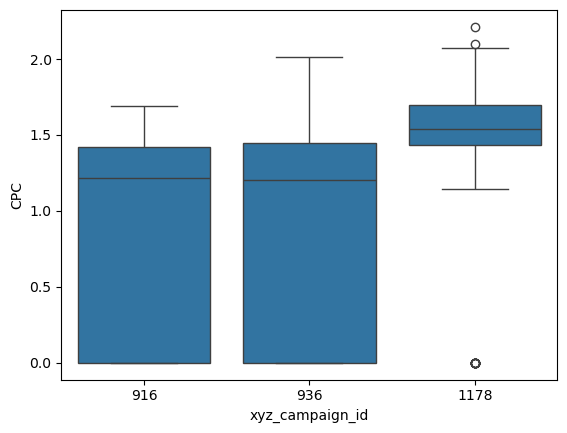

In [22]:
sns.boxplot(data = df, x = "xyz_campaign_id", y = "CPC")
plt.show()

Campaign 1178 has the highest average Cost per click

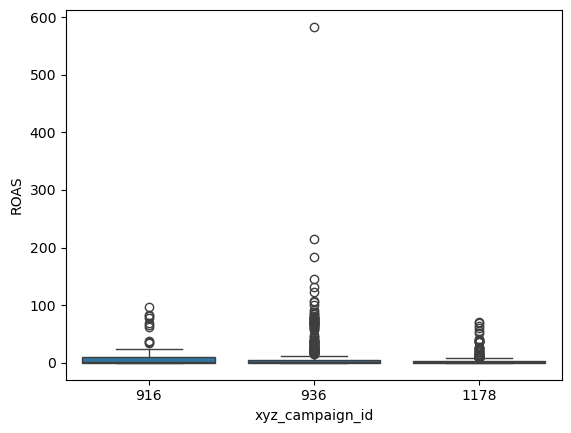

In [23]:
sns.boxplot(data = df, x = "xyz_campaign_id", y = "ROAS")
plt.show()

Campaigns 916 and 936 are more cost-efficient, and perform better in terms of conversions. Check if the difference is significant or due to chance.

# A/B Testing - Campaign effectiveness

Steps:
- Check if samples have normal distribution using Shapiro-Wilk test
    - If normal check for variace homogenity using Levene's test
         - If homogenous, perform pair-wise T-test
         - If not homogenous, perform pair-wise Welch's test
    - If not normal, perform pair-wise Mann Whitney U test

## Shapiro-Wilk normal distribution test
- Null hypothesis: sample distribution is close to normal
- Alternate hypothesis: sample distribution is not close to normal
- Significance level = 0.05

### Checking conversion rate

In [26]:
_, p_val_916 = shapiro(df[df["xyz_campaign_id"] == 916]["Sales_CR"])
_, p_val_936 = shapiro(df[df["xyz_campaign_id"] == 936]["Sales_CR"])
_, p_val_1178 = shapiro(df[df["xyz_campaign_id"] == 1178]["Sales_CR"])

In [ ]:
print(f"Shapiro-Wilk p_value for campaign 916: {p_val_916}")
print(f"Shapiro-Wilk p_value for campaign 936: {p_val_936}")
print(f"Shapiro-Wilk p_value for campaign 1178: {p_val_1178}")

Shapiro-Wilk p_value for campaign 916: 1.5995537886247953e-11
Shapiro-Wilk p_value for campaign 936: 2.876502469063146e-34
Shapiro-Wilk p_value for campaign 1178: 1.3024039742588091e-40


### Checking CTR

In [28]:
_, p_val_916 = shapiro(df[df["xyz_campaign_id"] == 916]["CTR"])
_, p_val_936 = shapiro(df[df["xyz_campaign_id"] == 936]["CTR"])
_, p_val_1178 = shapiro(df[df["xyz_campaign_id"] == 1178]["CTR"])

In [29]:
print(f"Shapiro-Wilk p_value for campaign 916: {p_val_916}")
print(f"Shapiro-Wilk p_value for campaign 936: {p_val_936}")
print(f"Shapiro-Wilk p_value for campaign 1178: {p_val_1178}")

Shapiro-Wilk p_value for campaign 916: 7.776329091101973e-05
Shapiro-Wilk p_value for campaign 936: 1.4289064771011604e-19
Shapiro-Wilk p_value for campaign 1178: 0.0004589840153849015


### Checking CPC

In [30]:
_, p_val_916 = shapiro(df[df["xyz_campaign_id"] == 916]["CPC"])
_, p_val_936 = shapiro(df[df["xyz_campaign_id"] == 936]["CPC"])
_, p_val_1178 = shapiro(df[df["xyz_campaign_id"] == 1178]["CPC"])

In [31]:
print(f"Shapiro-Wilk p_value for campaign 916: {p_val_916}")
print(f"Shapiro-Wilk p_value for campaign 936: {p_val_936}")
print(f"Shapiro-Wilk p_value for campaign 1178: {p_val_1178}")

Shapiro-Wilk p_value for campaign 916: 7.768733233031107e-08
Shapiro-Wilk p_value for campaign 936: 2.588529308012372e-24
Shapiro-Wilk p_value for campaign 1178: 1.30539388119074e-31


Conclusion - Distributions are not normally distributed

Therefore, we can perform a Mann Whitney U test

## Mann Whitney U test
- Null hypothesis: There is no difference between the central tendencies of both groups
- Alternate hypothesis: There is a significant difference between the central tendencies of both groups
- Significance level: 0.05

### Checking conversion rate

In [42]:
_, p_val_916_936 = mannwhitneyu(x = df[df["xyz_campaign_id"] == 916]["Sales_CR"], y = df[df["xyz_campaign_id"] == 936]["Sales_CR"])
_, p_val_936_1178 = mannwhitneyu(x = df[df["xyz_campaign_id"] == 936]["Sales_CR"], y = df[df["xyz_campaign_id"] == 1178]["Sales_CR"])
_, p_val_1178_916 = mannwhitneyu(x = df[df["xyz_campaign_id"] == 1178]["Sales_CR"], y = df[df["xyz_campaign_id"] == 916]["Sales_CR"])

In [43]:
print(f"Mann Whiteny U p_value for campaigns 916 and 936: {p_val_916_936}")
print(f"Mann Whiteny U p_value for campaigns 936 and 1178: {p_val_936_1178}")
print(f"Mann Whiteny U p_value for campaigns 1178 and 916: {p_val_1178_916}")

Mann Whiteny U p_value for campaigns 916 and 936: 0.36064760544972174
Mann Whiteny U p_value for campaigns 936 and 1178: 6.5170516818151865e-15
Mann Whiteny U p_value for campaigns 1178 and 916: 0.04431745466583485


### Checking CTR

In [44]:
_, p_val_916_936 = mannwhitneyu(x = df[df["xyz_campaign_id"] == 916]["CTR"], y = df[df["xyz_campaign_id"] == 936]["CTR"])
_, p_val_936_1178 = mannwhitneyu(x = df[df["xyz_campaign_id"] == 936]["CTR"], y = df[df["xyz_campaign_id"] == 1178]["CTR"])
_, p_val_1178_916 = mannwhitneyu(x = df[df["xyz_campaign_id"] == 1178]["CTR"], y = df[df["xyz_campaign_id"] == 916]["CTR"])

In [45]:
print(f"Mann Whiteny U p_value for campaigns 916 and 936: {p_val_916_936}")
print(f"Mann Whiteny U p_value for campaigns 936 and 1178: {p_val_936_1178}")
print(f"Mann Whiteny U p_value for campaigns 1178 and 916: {p_val_1178_916}")

Mann Whiteny U p_value for campaigns 916 and 936: 0.47046238727864276
Mann Whiteny U p_value for campaigns 936 and 1178: 0.8227876003103414
Mann Whiteny U p_value for campaigns 1178 and 916: 0.36930646490439023


### Checking conversion rate

In [46]:
_, p_val_916_936 = mannwhitneyu(x = df[df["xyz_campaign_id"] == 916]["CPC"], y = df[df["xyz_campaign_id"] == 936]["CPC"])
_, p_val_936_1178 = mannwhitneyu(x = df[df["xyz_campaign_id"] == 936]["CPC"], y = df[df["xyz_campaign_id"] == 1178]["CPC"])
_, p_val_1178_916 = mannwhitneyu(x = df[df["xyz_campaign_id"] == 1178]["CPC"], y = df[df["xyz_campaign_id"] == 916]["CPC"])

In [47]:
print(f"Mann Whiteny U p_value for campaigns 916 and 936: {p_val_916_936}")
print(f"Mann Whiteny U p_value for campaigns 936 and 1178: {p_val_936_1178}")
print(f"Mann Whiteny U p_value for campaigns 1178 and 916: {p_val_1178_916}")

Mann Whiteny U p_value for campaigns 916 and 936: 0.7970274733773802
Mann Whiteny U p_value for campaigns 936 and 1178: 3.206787240273559e-76
Mann Whiteny U p_value for campaigns 1178 and 916: 1.9701792542537628e-18


- There is no significant difference between campaigns 916 and 936. This means that the changes in these campaigns have not resulted in significantly different result over the other
- There is a significant difference between campaigns 1178 and 916, as well as between campaigns 1178 and 936. This means that the changes between 1178 and the other campaigns have resulted in significant result differences
- Campaigns 916 and 936 have better performance metrics over 1178. However, the volume in both these campaigns is small as compared to 1178, and it is tough to determine if the performance will scale as the volume of these campaign increases

# Campaign 1178 deep dive

Since there has been a lot of volume and spend in campaign 1178, it is essential to determine the factors leading to its performance or the lack thereof.

In [48]:
data1178 = df[df["xyz_campaign_id"] == 1178]
data1178.shape

(625, 16)

In [49]:
data1178.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,Enquiry_CR,Sales_CR,CPC,ROAS
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,19.858156,9.929078,1.801773,6.061799
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,19.402985,7.462687,1.826866,4.616013
520,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,0.000000,0.000000,0.000000,0.000000
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,10.000000,4.000000,1.726600,2.606278
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,12.790698,2.325581,1.882674,1.574949


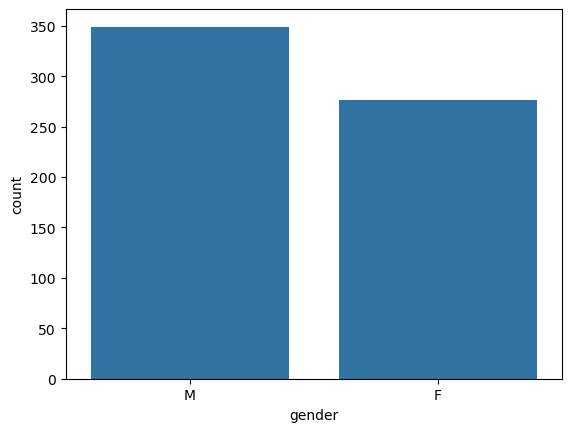

In [50]:
sns.countplot(data = data1178, x = "gender")
plt.show()

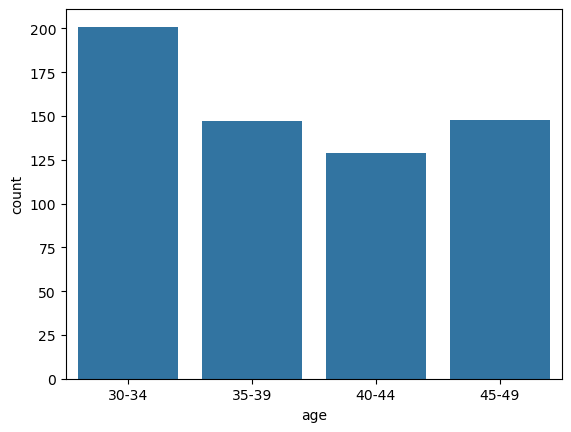

In [51]:
sns.countplot(data = data1178, x = "age")
plt.show()

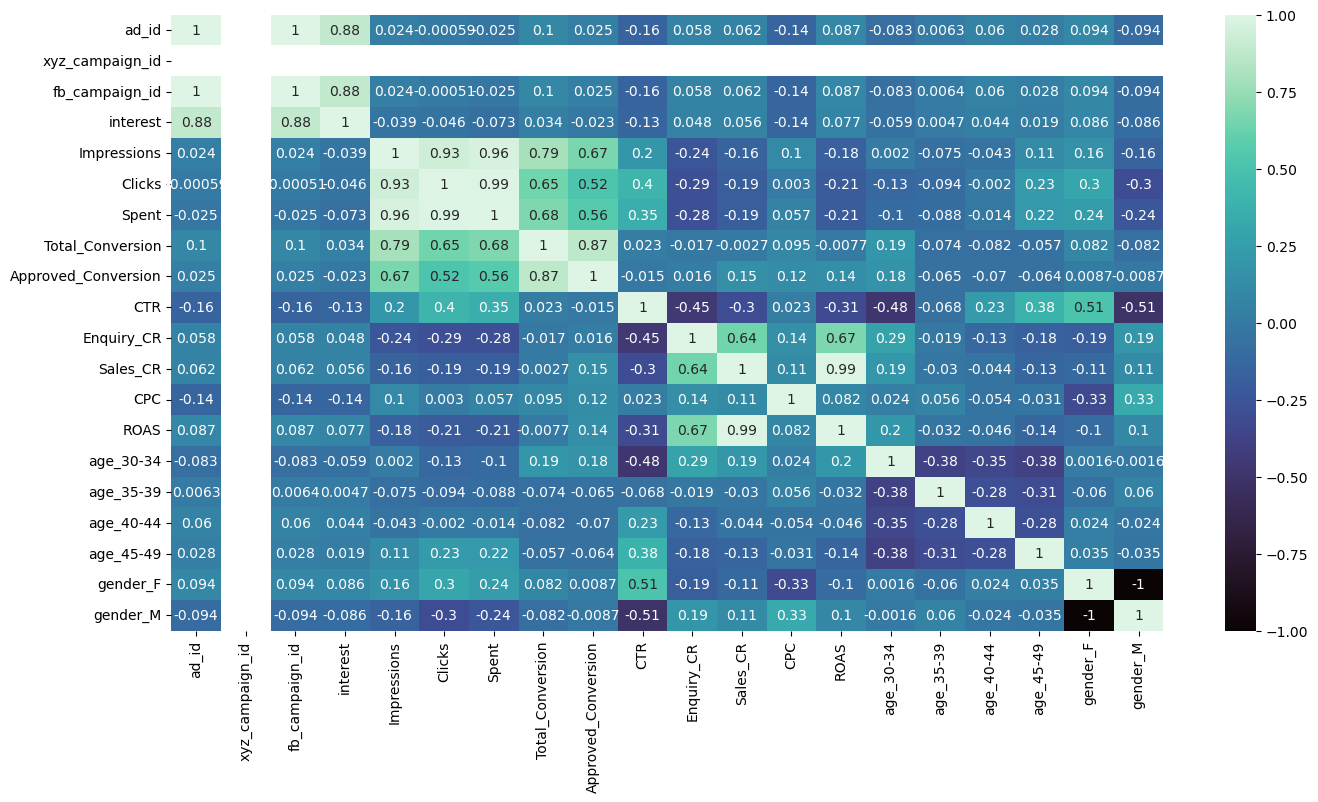

In [64]:
dummy_cols = pd.get_dummies(data1178[["age", "gender"]], dtype = int)
temp_data = pd.concat([data1178.drop(columns = ["age", "gender"]), dummy_cols], axis = 1)
corr_1178 = temp_data.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr_1178, annot = True, cmap = "mako")
plt.show()

From the heatmap, we can see that there is some positive correlation between Conversion and the amount Spent. This can be explored further

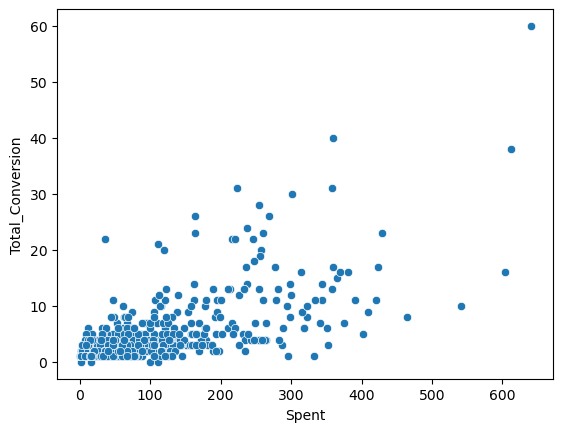

In [70]:
sns.scatterplot(data = data1178, x = "Spent", y = "Total_Conversion")
plt.show()

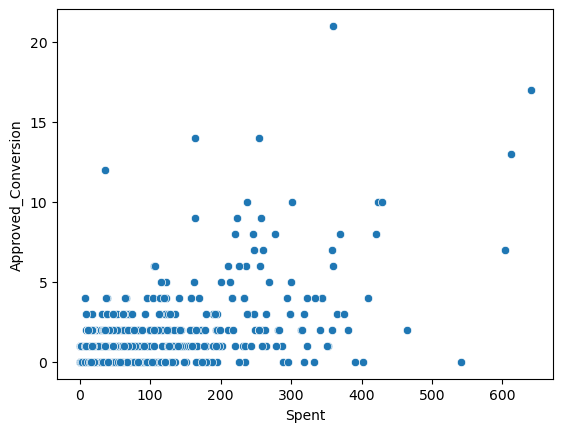

In [71]:
sns.scatterplot(data = data1178, x = "Spent", y = "Approved_Conversion")
plt.show()

It can be observed that as the Amount Spent increases, the Conversion numbers also increase. However, the volume of high spend ads is quite low to accurately draw this conclusion

## Breakdown by gender

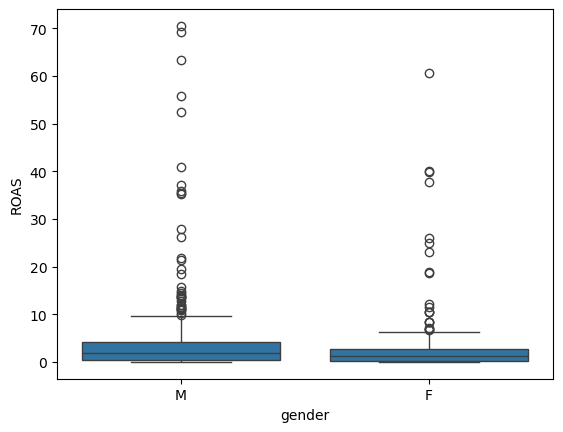

In [72]:
sns.boxplot(data = data1178, x = "gender", y = "ROAS")
plt.show()

In [75]:
temp_data = data1178.groupby(by = ["gender"]).agg({"ROAS":["mean", "median"]})
temp_data

ROAS          
            mean    median
gender                    
F       2.778312  1.181291
M       4.401312  1.791809

It looks like the campaing was more effective for Males over Females. Is there a statistically significant difference?

### Shapiro-Wilk test

Check if sample is normally distributed. (Significance level = 0.05)

In [77]:
_, p_val_m = shapiro(data1178[data1178["gender"] == "M"]["ROAS"])
_, p_val_f = shapiro(data1178[data1178["gender"] == "F"]["ROAS"])

print(f"Shapiro-Wilk p_value for Males: {p_val_m}")
print(f"Shapiro-Wilk p_value for Females: {p_val_f}")

Shapiro-Wilk p_value for Males: 3.2069275738370643e-31
Shapiro-Wilk p_value for Females: 3.3908524394656575e-29


Samples are not normally distributed, so we can use Mann Whitney U test

### Mann Whitney U test

In [83]:
metrics = ["ROAS", "Sales_CR", "CTR", "CPC"]

In [84]:
for m in metrics:
    _, p_val_gender = mannwhitneyu(x = data1178[data1178["gender"] == "M"][m], y = data1178[data1178["gender"] == "F"][m])
    print(f"Mann Whiteny U p_value for gender {m}: {p_val_gender}")

Mann Whiteny U p_value for gender ROAS: 0.00015219802747870153
Mann Whiteny U p_value for gender Sales_CR: 0.0062918536837085984
Mann Whiteny U p_value for gender CTR: 1.6428757998167664e-38
Mann Whiteny U p_value for gender CPC: 6.641956080740623e-46


All the metrics have p-values < 0.05, implying that there is a significant performance difference between Males and Females. The campaign was more effective for Males

## Breakdown by Interest

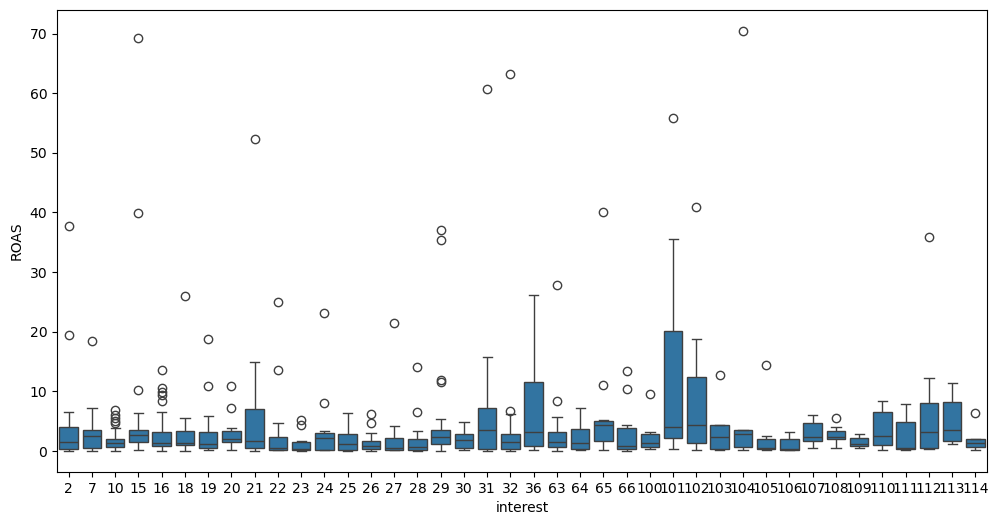

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(data = data1178, x = "interest", y = "ROAS")
plt.show()

In [ ]:
interests_df = data1178.groupby(by = ["interest"]).agg({"ROAS":"mean", "Clicks":"sum", "Sales_CR":"mean", "CPC":"mean"}).sort_values(by = "ROAS", ascending= False)
interests_df.head(10)

,ROAS,Clicks,Sales_CR,CPC
interest,,,,
104,15.514689,265,21.435407,1.472001
101,14.953680,524,20.913436,1.464570
102,10.356094,150,12.734488,1.412382
112,8.059562,339,10.736572,1.475474
15,7.889540,1554,10.863716,1.589519
31,7.709566,189,11.234475,1.469505
36,7.379306,126,10.719921,1.621444
65,6.995963,343,9.178675,1.466852
21,6.056343,493,10.244547,1.594203


Interests 101, 15 and 21 have high ROAS, high Click count and low CPC

In [91]:
int_data = data1178[data1178["interest"].isin([101, 15, 21])]
int_data.shape

(49, 16)

In [94]:
grouped_int_data = int_data.groupby(by = ["interest", "gender"]).agg({"ROAS":["median", "mean"], "Clicks":"sum", "Sales_CR":"mean", "CPC":"mean"})
grouped_int_data

ROAS            Clicks   Sales_CR       CPC
                    median       mean    sum       mean      mean
interest gender                                                  
15       F        1.980670   6.383166    727   7.982511  1.430638
         M        2.787577   8.893790    827  12.784520  1.695439
21       F        2.603242   3.360678    293   4.529073  1.526044
         M        1.473603   8.752007    200  15.960020  1.662361
101      F        3.402840   3.272918    507   4.098512  1.442498
         M       35.472973  30.528030     17  43.333333  1.494000

Campaign 101 has extremely high ROAS with Male demographics. For a spend of $1.5, a revenue of $30.5 is generated. However, the number of Clicks are too low to make solid conclusions. It also has a decent ROAS with Female demographics, but the average ROAS are higher for campaigns 21 and 15

In [95]:
grouped_int_data = int_data.loc[int_data["interest"] != 101].groupby(by = ["interest", "gender", "age"]).agg({"ROAS":["median", "mean"], "Clicks":"sum", "Sales_CR":"mean", "CPC":"mean"})
grouped_int_data

ROAS            Clicks   Sales_CR       CPC
                          median       mean    sum       mean      mean
interest gender age                                                    
15       F      30-34   2.350308   2.280810    256   2.817213  1.473532
                35-39  21.435718  21.435718     27  27.000000  1.403900
                40-44   1.257636   1.257636    142   1.408451  1.371901
                45-49   0.046913   0.046913    302   0.000000  1.422401
         M      30-34   4.730329  17.221910    495  24.626016  1.796566
                35-39   2.069225   2.021118    168   3.301699  1.745400
                40-44   2.623688   2.623688     26   3.846154  1.539231
                45-49   1.570681   3.976298    138   5.510968  1.529003
21       F      30-34   5.701471   6.127946    105   8.833333  1.624864
                35-39   1.493045   1.493045     65   1.754386  1.557566
                40-44   0.520291   2.534509     60   3.030303  1.481797
                45-49   0.933029   0.933029     63   0.943396  1.363255
         M      30-34  13.924051  18.439987     58  34.635854  1.979559
                35-39   1.472096   1.472096     44   1.190476  1.779048
                40-44   0.000000   0.000000      0   0.000000  0.000000
                45-49   0.450045   0.375985     98   0.000000  1.610027

- It can be observed that ROAS is highest for interest 15, Males and age 30-34. Advertising to this group generates a revenue of ~$17.23 for every $1.8 spend. This group also has the highest number of Clicks. 
- In contrast ROAS is lowest for interest 15, Females and age 45-49. Advertising to this group costs more than the revenue it generates. This group has the second highest number of clicks.

# Concluding notes
- Campaigns 916 and 936 have no significant performance differences.
- Campaign 1178 has higher volume spend, but is not as effective as the other campaigns. This can be improved by changing the strategy.
    - It is more effective for Males over Females. The budget should be allocated respectively
    - It is extremely effective for Males with Interest 101 with an ROAS of ~$30 per $1.5 spent. However, the number of Clicks are too low to warrant a budget increase. Instead, this should be monitored for a longer time
    - It is extremely effective for Males of age 30-34 with Interest 15 with an ROAS of ~$17 per $1.8 spent. This group also has the highest Clicks and hence the performance is backed by numbers. More budget can be allocated on advertising to this group
    - Other groups with high ROAS can be identified, but need to be monitored for a longer time for more Click volume
    - It is ineffective for Females of age 45-49 with Interest 15. This performance is also backed by a high number of Clicks. The advertising budget for this group can be cut down to remove overhead spend.
- Campaigns should be focused on ages 30-34 as they provide the best ROAS, CTR and Conversion